In [1]:
import pandas as pd

In [2]:
week1 = pd.read_csv("Restaurant - Week 1 Sales.csv")
week2 = pd.read_csv("Restaurant - Week 2 Sales.csv")
customers = pd.read_csv("Restaurant - Customers.csv")
foods = pd.read_csv("Restaurant - Foods.csv")

### The __pd.concat()__ method

- This method is used to combine two or more dataFrames
- Its first param is a list of the DFs that you want to combine
- It has a _ignore_index_ param that you can use to reset the index to make everything uniform(default: False)
- To be able to differentiate between the two combined DFs, we use a param called _keys_ . Note: when you do this, you do not need to use _ignore_index_

In [3]:
pd.concat([week1,week2], ignore_index= True).tail()

,Customer ID,Food ID
495,783,10
496,556,10
497,547,9
498,252,9
499,249,6


In [4]:
pd.concat([week1,week2], keys=["W1", "W2"]).head()
#now we know where the data comes from

Customer ID  Food ID
W1 0          537        9
   1           97        4
   2          658        1
   3          202        2
   4          155        9

### The .append() Method

The only difference between this method and pd.concat() method is that you call .append() method on the DF object.
However, you call .concat() method on the pd object itself

In [5]:
week2.append(week1, ignore_index= True).head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


![Sql Joins](http://1.bp.blogspot.com/-E3Hj3JNrCuM/T-gRz-tToWI/AAAAAAAAAOI/Azi7Hr7IWV0/s1600/SQL+Joinsjpg.jpg)

## Inner Joins

In [6]:
week1.merge(right=week2, how="inner", on="Customer ID", suffixes= ["-Week1", "-Week2"]).head()

,Customer ID,Food ID-Week1,Food ID-Week2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9


See how we joined both DataFrames:
- we used the __.merge()__ method
- the first param: __right__ which indicates which Df you want to merge with
- the second param: __how__ which sets what kind of join you want i.e. inner,outer e.t.c.
- the third param:  __on__ which means on what common field do you want to merge both DFs (this is the _foreign_key in SQL)
- the __suffixes__ param is an indicator for different fields when the DFs are joined. To differentiate.

In [7]:
mask = week1["Customer ID"] == 233
week1[mask]

,Customer ID,Food ID
94,233,3


In [8]:
mask1 = week2["Customer ID"] == 233
week2[mask1]

,Customer ID,Food ID
238,233,3


## Outter Joins

In [9]:
week1.merge(week2, how="outer", on = "Customer ID", suffixes= ["-Week1", "-Week2"], indicator= True).head()

,Customer ID,Food ID-Week1,Food ID-Week2,_merge
0,537,9.0,5.0,both
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
4,155,9.0,3.0,both


- outter joins combine data that are common to both DFs and inserts NaN to data that are not common
- as opposed to inner joins that only care about the intersections i.e. data that are only present in both DFs
- we can also add an __indicator__ param field that will give us a visiual idea of the type of merge

In [10]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [11]:
week2.head(3)

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10


In [12]:
merged = week1.merge(week2, how="outer", on = "Customer ID", suffixes= ["-Week1", "-Week2"], indicator= True)

In [13]:
mask1 = merged["_merge"] == "both"
mask2 = merged["_merge"] == "left_only"
mask3 = merged["_merge"] == "right_only"

merged[~mask1]

,Customer ID,Food ID-Week1,Food ID-Week2,_merge
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
10,71,3.0,NaN,left_only
11,71,8.0,NaN,left_only
12,174,3.0,NaN,left_only
13,961,9.0,NaN,left_only
14,966,5.0,NaN,left_only


## Left Joins

- left join is like vlookup in excel
- it takes into consideration all data that are in the left DF and also data in the right DF (that are also present in the left DF) that we want to look up extra info on


In [14]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [15]:
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


In [16]:
week1.merge(foods, how="left", on = "Food ID").head()

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99


See how it merged the data sets: <br>
- the right DF is the foods data that has all the info about different food IDs

## The left_on and right_on Parameters

- We use these params when the two DFs to be merged do not have a common field label to merge on
- We have to specify on each DF which fields to do the merge
- You can drop the duplicate field during the merger

In [17]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [18]:
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [19]:
 "Roger" in list(customers["First Name"])
#This is how you do a quick check if a string is in a Series - You must encapsulate the Series with a List
#You do not need to do this with numbers(int)

True

In [20]:
week2.merge(customers, how="left", left_on= "Customer ID", right_on= "ID").head()

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer


From the above see how we specified the left_on and right_on fields. However, see how "Customer ID" and "ID" fields are the same.<br> You can drop one of them during the merger

In [21]:
week2.merge(customers, how="left", left_on= "Customer ID", right_on= "ID").drop("ID", axis = "columns").head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,Roger,Gordon,Male,Skilith,Operator
4,267,3,Matthew,Wood,Male,Agimba,Product Engineer


## Merging by Indexes with left_index and right_index parameters

In [22]:
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


In [23]:
customers.set_index("ID", inplace= True)

In [24]:
customers.head(3)

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive


In [25]:
week1.head(2)

,Customer ID,Food ID
0,537,9
1,97,4


In [26]:
sales = week1.merge(customers, how="left", left_on='Customer ID', right_index= True)
sales.head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III


- see how we merged both DFs on the left's "Customer ID" label and the right's index values
- one advantage of doing this is that we do not get duplicate fields - where we have to drop a field during merger

In [27]:
#Now to get the Food data by their IDs , we will merge the above DF with the foods DF
sales.merge(foods, how="left", left_on="Food ID", right_index=True).head()

,Customer ID,Food ID_x,First Name,Last Name,Gender,Company,Occupation,Food ID_y,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,10.0,Drink,1.75
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,5.0,Pizza,2.49
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,2.0,Burrito,9.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,3.0,Taco,2.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,10.0,Drink,1.75


 - You can also use .join() method when you want to merge to DFs with similar index fields
 - You can also do a pd.merge() for merging operations

# Practice with Live Data - Summit

In [28]:
reps = pd.read_excel("SalesReps.xlsx")

In [29]:
reps.shape

(222, 10)

In [30]:
reps.head(3)

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
0,1,12,5,STRATIFICA,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,106,DORMANT LO,42467.85,36671.41,5796.44,13.65,44.0,965.18
2,1,12,111,DORMANT LO,15312.95,13763.90,1549.05,10.12,20.0,765.65


In [31]:
reps.nunique()

Location        3
Period          1
SLS           127
SLSRP NAME     98
SALES         155
COST          155
PROFIT        155
PFT %         146
ORDER          89
AVGOR         152
dtype: int64

In [32]:
#mask100 = (100 >= reps["SLS"]) & (reps["SLS"] <= 199)
#mask500 = 500 >= reps["SLS"] <= 599
salesReps = reps[(reps["SLS"] >= 500) & (reps["SLS"] <= 599)].dropna()

In [33]:
salesReps.head(3)

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
33,1,12,506,RYAN IRWIN,125120.13,106614.50,18505.63,14.79,124.0,1009.03
34,1,12,508,MICHAEL DA,145300.46,126236.30,19064.16,13.12,107.0,1357.95
35,1,12,511,RHYS LLOYD,148565.73,123527.03,25038.70,16.85,121.0,1227.82


In [34]:
salesReps["SLSRP NAME"] = salesReps["SLSRP NAME"].str.title()

In [35]:
loc = salesReps.groupby("Location")

In [36]:
loc.first()

,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
Location,,,,,,,,,
1,12,506,Ryan Irwin,125120.13,106614.50,18505.63,14.79,124.0,1009.03
2,12,540,Inside Sal,1869.61,1502.62,366.99,19.63,3.0,623.20
3,12,517,Joanne Dec,135481.81,113793.75,21688.06,16.01,86.0,1575.37


In [37]:
loc["SALES"].min()

Location
1     785.67
2    1869.61
3     555.43
Name: SALES, dtype: float64

In [38]:
loc.min()

,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
Location,,,,,,,,,
1,12,506,Aron Leves,785.67,662.76,122.91,13.07,1.0,653.69
2,12,540,Channing N,1869.61,1502.62,366.99,12.26,2.0,623.20
3,12,517,Channing N,555.43,483.44,71.99,12.79,1.0,405.49


In [39]:
salesYear = pd.read_excel("sum_sales.xlsx")

In [40]:
salesYear.shape

(2774, 10)

In [41]:
salesYear.head(3)

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
0,1,1,5,STRATIFICA,NaN,NaN,NaN,NaN,1,NaN
1,1,1,111,RHYS LLOYD,9246.7,8274.79,971.91,10.51,9,1027.41
2,1,1,114,PAUL CRELL,106257,91695.4,14561.45,13.7,80,1328.21


In [42]:
salesYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 10 columns):
Location      2774 non-null int64
Period        2774 non-null int64
SLS           2774 non-null int64
SLSRP NAME    2774 non-null object
SALES         2184 non-null object
COST          2184 non-null object
PROFIT        2175 non-null float64
PFT %         2164 non-null object
ORDER         2140 non-null object
AVGOR         2136 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 216.8+ KB


In [43]:
salesYear.dropna(how="any", inplace=True)

In [44]:
#reps[(reps["SLS"] >= 500) & (reps["SLS"] <= 599)]
newReps = salesYear[(salesYear["SLS"] >= 500) & (salesYear["SLS"] <= 599)]

In [45]:
newReps.shape

(521, 10)

In [46]:
newReps.nunique()

Location        3
Period         13
SLS            41
SLSRP NAME     48
SALES         521
COST          521
PROFIT        521
PFT %         402
ORDER         162
AVGOR         520
dtype: int64

In [47]:
repGroup = newReps.groupby("SLSRP NAME")

In [48]:
Aron = repGroup.get_group("ARON LEVES")
Aron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 31 to 945
Data columns (total 10 columns):
Location      13 non-null int64
Period        13 non-null int64
SLS           13 non-null int64
SLSRP NAME    13 non-null object
SALES         13 non-null object
COST          13 non-null object
PROFIT        13 non-null float64
PFT %         13 non-null object
ORDER         13 non-null object
AVGOR         13 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ KB


In [49]:
Aron["SALES"] = Aron["SALES"].astype("int")
Aron["COST"] = Aron["COST"].astype("int")

C:\Users\adminco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adminco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
Aron.nlargest(5,"SALES")

,Location,Period,SLS,SLSRP NAME,SALES,COST,PROFIT,PFT %,ORDER,AVGOR
553,1,8,513,ARON LEVES,181778,155779,25999.27,14.3,115,1580.68
476,1,7,513,ARON LEVES,168883,144593,24290.19,14.38,120,1407.36
630,1,9,513,ARON LEVES,165990,142261,23729.26,14.3,111,1495.41
400,1,6,513,ARON LEVES,155787,133117,22669.61,14.55,114,1366.56
324,1,5,513,ARON LEVES,153317,130234,23083.05,15.06,116,1321.70


In [51]:
maxSales = repGroup.max()[["Location", "SLS", "Period", "SALES"]]

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
%matplotlib inline

In [54]:
SR = list(maxSales.index)

In [55]:
maxSales.head()

,Location,SLS,Period,SALES
SLSRP NAME,,,,
ARON LEVES,1,513,13,181778.74
BO DING,3,581,5,4568.77
BRIAN GRAH,3,599,5,49982.69
CHANNING N,3,575,13,374035.62
CURVE LAKE,3,599,8,1234.56


In [56]:
maxSales.columns = maxSales.columns.str.title()

In [57]:
#maxSales["Salesreps"] = maxSales["Salesreps"].str.title()

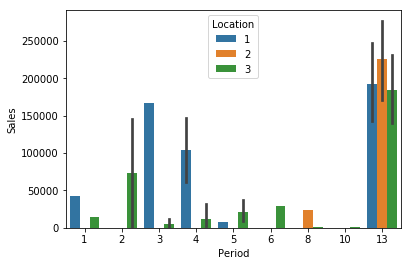

In [58]:
sns.barplot(x="Period", y="Sales", data=maxSales, hue = "Location")

In [59]:
mam = repGroup.get_group("MAMDOUH AB")

In [60]:
mam.nunique()

AVGOR       21
COST        21
Location     2
ORDER       16
PFT %       21
PROFIT      21
Period      13
SALES       21
SLS          2
dtype: int64

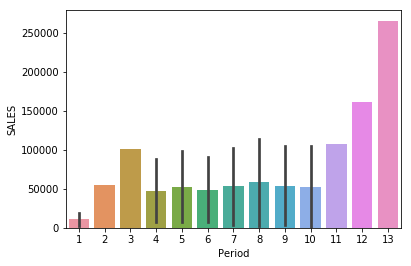

In [61]:
sns.barplot(x="Period", y="SALES", data=mam)

In [62]:
newReps.columns = newReps.columns.str.title()

In [63]:
newReps["Slsrp Name"] = newReps["Slsrp Name"].str.title()

C:\Users\adminco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
newReps.head(3)

,Location,Period,Sls,Slsrp Name,Sales,Cost,Profit,Pft %,Order,Avgor
28,1,1,506,Ryan Irwin,56971.7,44910.1,12061.62,21.17,51,1117.09
29,1,1,508,Michael Da,77551.7,66643.7,10908.07,14.07,65,1193.10
30,1,1,511,Rhys Lloyd,99699,84334.3,15364.66,15.41,102,977.44


In [65]:
newReps.nunique()

Location        3
Period         13
Sls            41
Slsrp Name     48
Sales         521
Cost          521
Profit        521
Pft %         402
Order         162
Avgor         520
dtype: int64

In [66]:
locGroup = newReps.groupby(["Location", "Period"])

In [67]:
locGroup.size()

Location  Period
1         1         17
          2         16
          3         17
          4         16
          5         15
          6         14
          7         12
          8         12
          9         14
          10        15
          11        14
          12        14
          13        14
2         1         15
          2         14
          3         14
          4         13
          5         11
          6         10
          7         11
          8         11
          9         10
          10        10
          11        10
          12        11
          13        12
3         1         13
          2         19
          3         19
          4         17
          5         18
          6         13
          7         12
          8         12
          9         10
          10        13
          11        11
          12        11
          13        11
dtype: int64

In [68]:
loc1P1 = locGroup.get_group((1,1))

In [69]:
loc1P1.head()

,Location,Period,Sls,Slsrp Name,Sales,Cost,Profit,Pft %,Order,Avgor
28,1,1,506,Ryan Irwin,56971.7,44910.1,12061.62,21.17,51,1117.09
29,1,1,508,Michael Da,77551.7,66643.7,10908.07,14.07,65,1193.10
30,1,1,511,Rhys Lloyd,99699,84334.3,15364.66,15.41,102,977.44
31,1,1,513,Aron Leves,96556.7,80697,15859.70,16.43,68,1419.95
32,1,1,514,Paul Crell,146157,122457,23699.95,16.22,97,1506.77


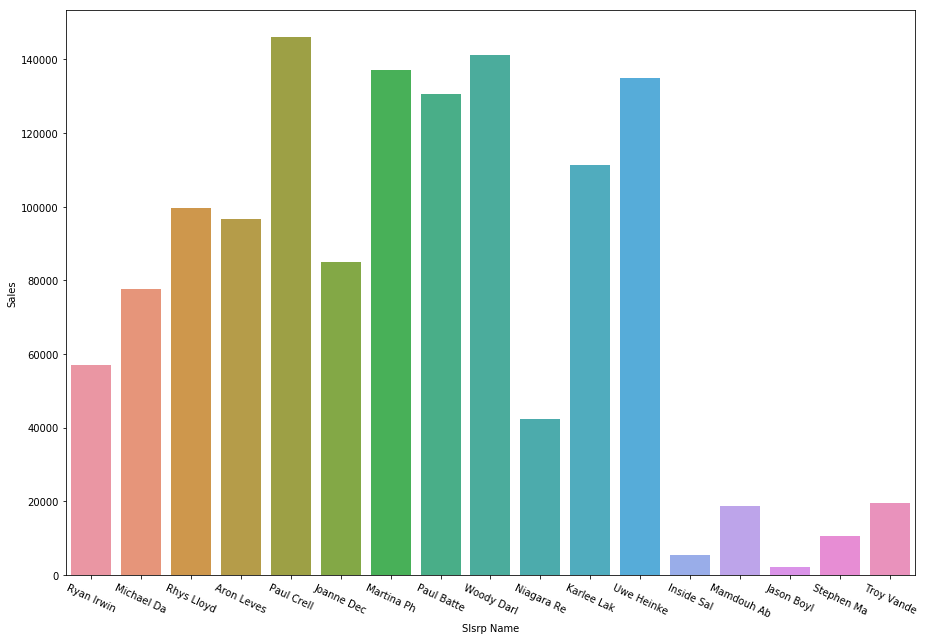

In [70]:
plt.figure(figsize=(13,9))
ax = sns.barplot(x="Slsrp Name", y="Sales", data=loc1P1)
plt.xticks(rotation=-25)
plt.tight_layout()

In [71]:
newReps.shape

(521, 10)

In [72]:
profit = locGroup.sum()

In [73]:
profit.head(3)

Sls     Profit     Avgor
Location Period                           
1        1       9109  214332.70  22869.21
         2       8521  227745.62  21629.91
         3       9109  235181.51  25716.67

In [74]:
profit.reset_index(inplace= True)

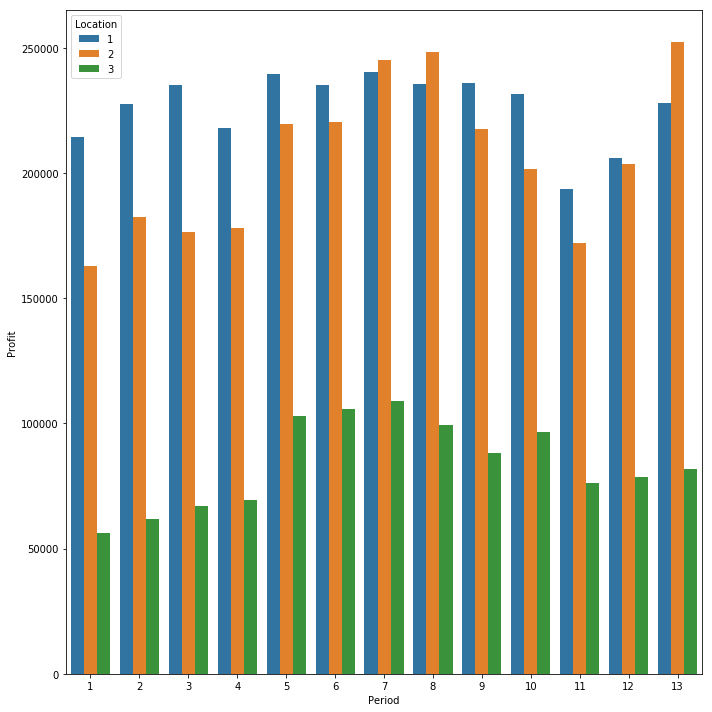

In [75]:
plt.figure(figsize=(10,10))
#fig.add_axes([0,0,1,1])
sns.barplot(x="Period", y="Profit", data=profit, hue="Location")
plt.tight_layout()

In [76]:
newReps.groupby("Location").size()

Location
1    190
2    152
3    179
dtype: int64

C:\Users\adminco\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


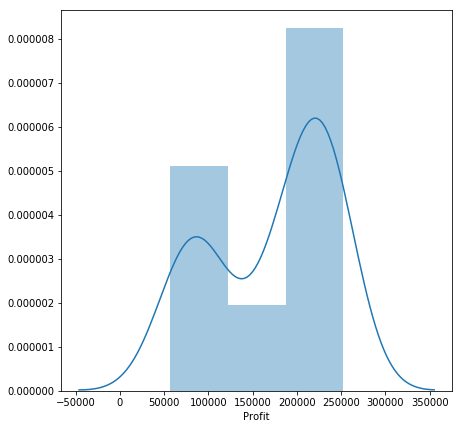

In [77]:
plt.figure(figsize=(7,7))
sns.distplot(profit["Profit"],hist=True,kde=True)

In [78]:
profit.sort_values("Profit", ascending=False)

,Location,Period,Sls,Profit,Avgor
25,2,13,6836,252592.41,17723.43
20,2,8,6288,248477.97,16883.25
19,2,7,6288,245173.28,16319.20
6,1,7,6356,240420.81,17983.20
4,1,5,8000,239708.75,21177.43
8,1,9,7470,235838.52,27801.89
7,1,8,6356,235774.03,17464.45
5,1,6,7486,235232.07,22085.67
2,1,3,9109,235181.51,25716.67
9,1,10,8054,231665.28,21583.76


In [79]:
customers.head(3)

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive


In [80]:
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


In [81]:
custFoods = customers.merge(foods,how="left",left_index=True,right_on="Food ID")
custFoods.head()

,First Name,Last Name,Gender,Company,Occupation,Food ID,Food Item,Price
0,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist,1,Sushi,3.99
1,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer,2,Burrito,9.99
2,Roger,Black,Male,Tagfeed,Account Executive,3,Taco,2.99
3,Steven,Evans,Male,Fatz,Registered Nurse,4,Quesadilla,4.25
4,Judy,Morrison,Female,Demivee,Legal Assistant,5,Pizza,2.49


In [82]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
First Name    1000 non-null object
Last Name     1000 non-null object
Gender        1000 non-null object
Company       1000 non-null object
Occupation    1000 non-null object
dtypes: object(5)
memory usage: 46.9+ KB


In [83]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Food ID      10 non-null int64
Food Item    10 non-null object
Price        10 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [84]:
customers.head()

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive
4,Steven,Evans,Male,Fatz,Registered Nurse
5,Judy,Morrison,Female,Demivee,Legal Assistant


In [85]:
foods.head(10)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49
5,6,Pasta,13.99
6,7,Steak,24.99
7,8,Salad,11.25
8,9,Donut,0.99
9,10,Drink,1.75


In [86]:
customers.shape

(1000, 5)

In [87]:
week1.head(2)

,Customer ID,Food ID
0,537,9
1,97,4


In [88]:
customers.head(2)

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer


In [89]:
customersW1 = week1.merge(customers, how="left",left_on="Customer ID", right_index=True)

In [90]:
customersW1.head(2)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator


In [91]:
foods.head(2)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99


In [92]:
custFoodsW1 = customersW1.merge(foods, how="left", on="Food ID")

In [93]:
custFoodsW1.head(2)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25


In [94]:
custFoodsW1.shape

(250, 9)

In [95]:
custFoodsW1.nunique()

Customer ID    221
Food ID         10
First Name     136
Last Name      141
Gender           2
Company        173
Occupation     115
Food Item       10
Price           10
dtype: int64

In [96]:
sexGroup = custFoods.groupby("Gender")

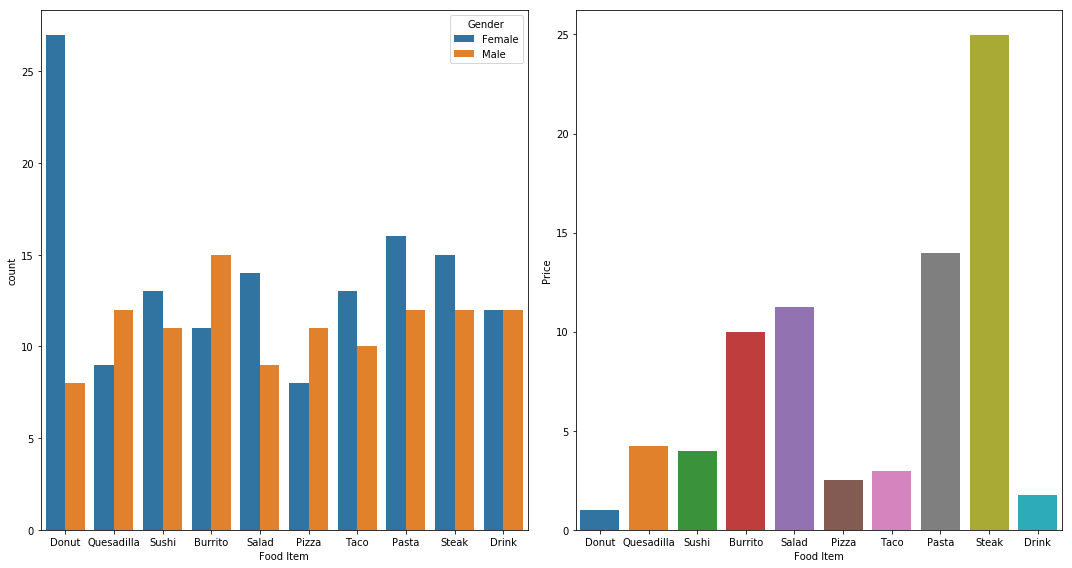

In [97]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.countplot(x="Food Item", data=custFoodsW1, hue="Gender", ax=axes[0])
sns.barplot(x="Food Item", y="Price", data=custFoodsW1, ax=axes[1])
plt.tight_layout()

In [98]:
foodItemGroup = custFoodsW1.groupby("Food Item")

In [99]:
foodItemGroup.size()

Food Item
Burrito       26
Donut         35
Drink         24
Pasta         28
Pizza         19
Quesadilla    21
Salad         23
Steak         27
Sushi         24
Taco          23
dtype: int64

In [100]:
foodItemGroup.get_group("Taco")["Occupation"].value_counts()

Recruiter                       2
Marketing Manager               2
Administrative Officer          2
Geological Engineer             2
Actuary                         1
Structural Analysis Engineer    1
Librarian                       1
Financial Advisor               1
Developer I                     1
Mechanical Systems Engineer     1
Occupational Therapist          1
Data Coordiator                 1
Chief Design Engineer           1
Automation Specialist III       1
Editor                          1
Desktop Support Technician      1
Senior Financial Analyst        1
Senior Developer                1
Safety Technician IV            1
Name: Occupation, dtype: int64

In [101]:
custFoodsW1.head()

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99


C:\Users\adminco\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


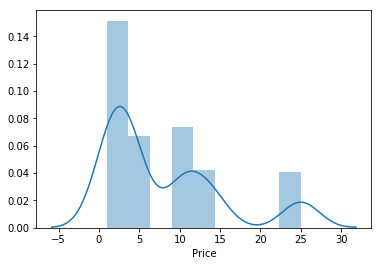

In [102]:
sns.distplot(custFoodsW1["Price"])

In [103]:
custFoodsW1["Price"].value_counts().sort_values(ascending =False)

0.99     35
13.99    28
24.99    27
9.99     26
1.75     24
3.99     24
11.25    23
2.99     23
4.25     21
2.49     19
Name: Price, dtype: int64

In [104]:
OccupationGroup = custFoodsW1.groupby("Occupation")

In [105]:
OccupationGroup.sum().sort_values("Price", ascending = False)

,Customer ID,Food ID,Price
Occupation,,,
Speech Pathologist,1812,29,64.96
Compensation Analyst,3855,28,59.71
Recruiter,2761,30,57.71
Marketing Manager,2089,25,55.19
Community Outreach Specialist,2408,25,53.95
Sales Representative,1701,36,52.20
Dental Hygienist,651,14,49.98
Analyst Programmer,739,15,48.97
Account Executive,1375,11,44.97


In [106]:
custFoodsW1["Price"].sum()

1962.6800000000003

In [107]:
newReps.head()

,Location,Period,Sls,Slsrp Name,Sales,Cost,Profit,Pft %,Order,Avgor
28,1,1,506,Ryan Irwin,56971.7,44910.1,12061.62,21.17,51,1117.09
29,1,1,508,Michael Da,77551.7,66643.7,10908.07,14.07,65,1193.10
30,1,1,511,Rhys Lloyd,99699,84334.3,15364.66,15.41,102,977.44
31,1,1,513,Aron Leves,96556.7,80697,15859.70,16.43,68,1419.95
32,1,1,514,Paul Crell,146157,122457,23699.95,16.22,97,1506.77


In [108]:
newReps.shape

(521, 10)

In [116]:
pnet = pd.read_excel("Pnet_New.xlsx",parse_dates=["Last Logon Date","Last Logon Time","Last Order Date","Last Order Time","Account Expires"])
client = pd.read_excel("clients.xlsx")

In [114]:
pnet.head(2)

,Username,Password,Company,Division,Location,Customer#,Status,Last Logon Date,Last Logon Time,Last Order Date,Last Order Time,Logons,Customer Name,Phone Number,Account Expires,Customer Email Address,Group Profile
0,46940,PN2114,1,1,2,46940,A,20190221,75159,20190221,75409,2306,SCOUTS CANADA CAMP OPEMIK,NaN,2019-12-31,JOHN.RATHIER@OTTAWA.CA; MJOHNSON@SCOUTS.CA,Profile00013
1,11899,PN1899,1,1,1,11899,D,20130325,0,0,0,39,WOODSTOCK GEN HOSPITAL,NaN,2019-12-31,TGOODALL@WGH.ON.CA,Profile00001


In [115]:
pnet.columns

Index(['Username', 'Password', 'Company', 'Division', 'Location', 'Customer#',
       'Status', 'Last Logon Date', 'Last Logon Time', 'Last Order Date',
       'Last Order Time', 'Logons', 'Customer Name', 'Phone Number',
       'Account Expires', 'Customer Email Address', 'Group Profile'],
      dtype='object')

In [130]:
client.head(3)

,Customer#,City,Province,SalesRep
0,50415,DORCHESTER,ON,511
1,126130,MISSISSAUGA,ON,600
2,126000,OAKVILLE,ON,600


In [129]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12484 entries, 0 to 12483
Data columns (total 4 columns):
Customer#    12484 non-null int64
City         12348 non-null object
Province     12409 non-null object
SalesRep     12484 non-null int64
dtypes: int64(2), object(2)
memory usage: 390.2+ KB


In [131]:
pnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5337 entries, 0 to 5336
Data columns (total 17 columns):
Username                  5337 non-null object
Password                  5337 non-null object
Company                   5337 non-null int64
Division                  5337 non-null int64
Location                  5337 non-null int64
Customer#                 5337 non-null int64
Status                    5337 non-null object
Last Logon Date           5337 non-null int64
Last Logon Time           5337 non-null int64
Last Order Date           5337 non-null int64
Last Order Time           5337 non-null int64
Logons                    5337 non-null int64
Customer Name             2363 non-null object
Phone Number              555 non-null object
Account Expires           5337 non-null datetime64[ns]
Customer Email Address    4718 non-null object
Group Profile             2239 non-null object
dtypes: datetime64[ns](1), int64(9), object(7)
memory usage: 708.9+ KB


In [135]:
pnet["Location"].value_counts()

3    2338
1    1462
2     990
8     547
Name: Location, dtype: int64

In [151]:
maskA = pnet["Location"] == 2
maskB = pnet["Status"] != "D"
pnetLoc2 = pnet[maskA & maskB]

In [159]:
pnetSls = pnet.merge(client,how="inner",on="Customer#")

In [160]:
pnetSls.head()

,Username,Password,Company,Division,Location,Customer#,Status,Last Logon Date,Last Logon Time,Last Order Date,Last Order Time,Logons,Customer Name,Phone Number,Account Expires,Customer Email Address,Group Profile,City,Province,SalesRep
0,46940,PN2114,1,1,2,46940,A,20190221,75159,20190221,75409,2306,SCOUTS CANADA CAMP OPEMIK,NaN,2019-12-31,JOHN.RATHIER@OTTAWA.CA; MJOHNSON@SCOUTS.CA,Profile00013,MABERLY,ON,564
1,WW100,SAMIND,1,1,3,701000,A,20190304,115432,20190304,122227,1362,NaN,NaN,2019-12-31,ww100@bestchickenwings.com,NaN,TORONTO,ON,740
2,WW100,SAMIND,1,1,3,701000,A,20190304,115432,20190304,122227,1362,NaN,NaN,2019-12-31,ww100@bestchickenwings.com,NaN,TORONTO,ON,740
3,70392M,DONTGIVE,1,1,3,70392,D,0,0,0,0,0,Reporting,123456789,2019-12-31,helpdesk@summit.colabor.com,Import,TORONTO,ON,493
4,70392,PN3104,1,1,8,70392,A,20140604,75835,20140602,154901,2,NaN,NaN,2019-12-31,collegest@coffeeculturecafe.com,NaN,TORONTO,ON,493


In [202]:
maskA = pnetSls["Location"] == 2
maskB = pnetSls["Status"] != "D"
maskC = pnetSls["SalesRep"] == 588
maskD = pnetSls["SalesRep"] == 584
pnet588 = pnetSls[maskC | maskD]
pnetLoc2 = pnetSls[maskA & maskB]

In [307]:
pnet588["SalesRep"].value_counts()

588    115
584     34
Name: SalesRep, dtype: int64

In [308]:
pnet588.head(2)

,Username,Password,Company,Division,Location,Customer#,Status,Last Logon Date,Last Logon Time,Last Order Date,Last Order Time,Logons,Customer Name,Phone Number,Account Expires,Customer Email Address,Group Profile,City,Province,SalesRep
41,31656,PN7672,1,1,8,31656,D,20141030,152852,20141030,155145,4,NaN,NaN,2019-12-31,lynee.smith@bluedoorshelters.ca,NaN,NEWMARKET,ON,588
49,31135,PN6322,1,1,8,31135,D,20140116,0,0,0,2,NaN,NaN,2019-12-31,chow.jd@gmail.com,NaN,BEAVERTON,ON,588


In [309]:
pnetLoc2.head(2)

,Username,Password,Company,Division,Location,Customer#,Status,Last Logon Date,Last Logon Time,Last Order Date,Last Order Time,Logons,Customer Name,Phone Number,Account Expires,Customer Email Address,Group Profile,City,Province,SalesRep
0,46940,PN2114,1,1,2,46940,A,20190221,75159,20190221,75409,2306,SCOUTS CANADA CAMP OPEMIK,NaN,2019-12-31,JOHN.RATHIER@OTTAWA.CA; MJOHNSON@SCOUTS.CA,Profile00013,MABERLY,ON,564
36,WW107,123456,1,1,2,701070,A,20190304,95437,20190304,95922,1122,NaN,NaN,2019-12-31,wildwingottawa@rogers.com,NaN,ORLEANS,ON,740


In [310]:
report = pnetLoc2.append(pnet588,ignore_index=True)
report.shape

(837, 20)

In [311]:
report.sort_values(by=["Last Logon Date","Logons"], ascending=[False,False])

,Username,Password,Company,Division,Location,Customer#,Status,Last Logon Date,Last Logon Time,Last Order Date,Last Order Time,Logons,Customer Name,Phone Number,Account Expires,Customer Email Address,Group Profile,City,Province,SalesRep
377,34105,PN4105,1,1,2,34105,A,20190305,153153,20190305,153559,1802,SKI MONT STE-MARIE,NaN,2019-12-31,CUISINE@MONTSTEMARIE.COM,Profile00004,LAC STE MARIE,QC,559
35,40640,PN2028,1,1,2,40640,A,20190305,144733,20190304,170608,1444,BYTOWN LES TRAITEURS,NaN,2019-12-31,STEVE@BYTOWNCATERING.COM,Profile00013,OTTAWA,ON,575
317,WW16,LAURA101,1,1,2,700160,A,20190305,104127,20190304,91448,1355,NaN,NaN,2099-12-31,wildwingottawa@rogers.com,NaN,OTTAWA,ON,740
318,WW16,LAURA101,1,1,2,700160,A,20190305,104127,20190304,91448,1355,NaN,NaN,2099-12-31,wildwingottawa@rogers.com,NaN,OTTAWA,ON,740
533,43300,PN5138,1,1,2,43300,A,20190305,142222,20190305,133200,1320,NaN,NaN,2099-12-31,augustin@northontariofoodsales.com,NaN,NORTH BAY,ON,566
27,40481,PN1840,1,1,2,40481,A,20190305,94138,20190303,93906,1249,NaN,NaN,2019-12-31,chef_james@live.ca,NaN,CHELSEA,QC,578
327,686430,PN8643,1,1,2,686430,A,20190305,101804,20190305,101911,1125,EAST SIDE MARIOS 8643,NaN,2019-12-31,fleurdelys@eastsidemarios.com,ESMFRENCH,QUEBEC CITY,QC,635
489,40257,PN8163,1,1,2,40257,A,20190305,93458,0,0,1075,NaN,NaN,2019-12-31,winonabennett1@gmail.com,NaN,COBDEN,ON,566
257,686340,PN8634,1,1,2,686340,A,20190305,115736,20190305,120436,1050,EAST SIDE MARIOS 8634,NaN,2019-12-31,cornwall@eastsidemarios.com,PRIME,CORNWALL,ON,635
438,43207,PN8413,1,1,2,43207,A,20190305,121635,20190304,104027,1010,NaN,NaN,2019-12-31,nektar_m@hotmail.com,NaN,LAVAL,QC,562


In [312]:
newReps.head()

,Location,Period,Sls,Slsrp Name,Sales,Cost,Profit,Pft %,Order,Avgor
28,1,1,506,Ryan Irwin,56971.7,44910.1,12061.62,21.17,51,1117.09
29,1,1,508,Michael Da,77551.7,66643.7,10908.07,14.07,65,1193.10
30,1,1,511,Rhys Lloyd,99699,84334.3,15364.66,15.41,102,977.44
31,1,1,513,Aron Leves,96556.7,80697,15859.70,16.43,68,1419.95
32,1,1,514,Paul Crell,146157,122457,23699.95,16.22,97,1506.77


In [313]:
per1 = newReps.groupby("Period")

In [314]:
per1 = per1.get_group(1)

In [315]:
per1.shape

(45, 10)

In [345]:
pnetReport = report.merge(per1, left_on="SalesRep", right_on="Sls",how="outer", indicator= True).drop([ 'Location_x', 'Period',
       'Sls','Sales', 'Cost', 'Profit', 'Pft %', 'Order',
       'Avgor'], axis=1)

In [346]:
pnetReport.columns

Index(['Username', 'Password', 'Company', 'Division', 'Customer#', 'Status',
       'Last Logon Date', 'Last Logon Time', 'Last Order Date',
       'Last Order Time', 'Logons', 'Customer Name', 'Phone Number',
       'Account Expires', 'Customer Email Address', 'Group Profile', 'City',
       'Province', 'SalesRep', 'Location_y', 'Slsrp Name', '_merge'],
      dtype='object')

In [347]:
notin = pnetReport["_merge"] == "right_only"
pnetReport = pnetReport[~notin]

In [348]:
pnetReport.drop(["Company","Division","_merge","Group Profile"], inplace= True, axis=1)

In [350]:
pnetReport.columns

Index(['Username', 'Password', 'Customer#', 'Status', 'Last Logon Date',
       'Last Logon Time', 'Last Order Date', 'Last Order Time', 'Logons',
       'Customer Name', 'Phone Number', 'Account Expires',
       'Customer Email Address', 'City', 'Province', 'SalesRep', 'Location_y',
       'Slsrp Name'],
      dtype='object')

In [352]:
pnetReport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 18 columns):
Username                  1094 non-null object
Password                  1094 non-null object
Customer#                 1094 non-null float64
Status                    1094 non-null object
Last Logon Date           1094 non-null float64
Last Logon Time           1094 non-null float64
Last Order Date           1094 non-null float64
Last Order Time           1094 non-null float64
Logons                    1094 non-null float64
Customer Name             310 non-null object
Phone Number              53 non-null object
Account Expires           1094 non-null datetime64[ns]
Customer Email Address    1057 non-null object
City                      1080 non-null object
Province                  1086 non-null object
SalesRep                  1094 non-null float64
Location_y                636 non-null float64
Slsrp Name                636 non-null object
dtypes: datetime64[ns](1), float64(8

In [353]:
pnetReport["Customer#"] = pnetReport["Customer#"].astype(int)
pnetReport["Last Logon Date"] = pnetReport["Last Logon Date"].astype("int")
pnetReport["Last Logon Time"] = pnetReport["Last Logon Time"].astype("int")
pnetReport["Last Order Date"] = pnetReport["Last Order Date"].astype("int")
pnetReport["Last Order Time"] = pnetReport["Last Order Time"].astype("int")
pnetReport["Logons"] = pnetReport["Logons"].astype(int)
pnetReport["SalesRep"] = pnetReport["SalesRep"].astype(int)

In [355]:
pnetReport.head()

,Username,Password,Customer#,Status,Last Logon Date,Last Logon Time,Last Order Date,Last Order Time,Logons,Customer Name,Phone Number,Account Expires,Customer Email Address,City,Province,SalesRep,Location_y,Slsrp Name
0,46940,PN2114,46940,A,20190221,75159,20190221,75409,2306,SCOUTS CANADA CAMP OPEMIK,NaN,2019-12-31,JOHN.RATHIER@OTTAWA.CA; MJOHNSON@SCOUTS.CA,MABERLY,ON,564,2.0,Lysa Harve
1,49505,PN6016,49505,A,20171124,202603,20170516,153721,325,David Potts,6139859788,2019-12-31,d.b.potts@hotmail.com,SHARBOT LAKE,ON,564,2.0,Lysa Harve
2,41030,PN0301,41030,A,20180209,182824,20160913,124054,879,Ed Saikaly,6132830265,2019-12-31,edsaikaly@gmail.com,LOMBARDY,ON,564,2.0,Lysa Harve
3,32720,PN2388,32720,A,20180816,120927,20180814,104417,56,Cindy Byker,6133411411,2019-12-31,cbyker@ripnet.com,MABERLY,ON,564,2.0,Lysa Harve
4,30615,PN1634,30615,A,20190111,124730,20180423,111654,10,NaN,NaN,2019-12-31,tiffany@antrimtruckstop.com,ARNPRIOR,ON,564,2.0,Lysa Harve
